# Практическая работа №2


## Цель

 * Знакомоство со способами визуализаций переменных и их отношений
 
 ## Ход работы
 
 ### 1. Загрузил набор данных с [потреблением алкоголя среди школьников](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption). набор является предложенным в практической работе.
 ### 2. Выполнил анализ данных
 1. Открыл набор данных и вывел техническую информацию о них

In [1]:
import numpy as np
import pandas as pd

port = pd.read_csv("DS/student-por.csv")
math = pd.read_csv("DS/student-mat.csv")

port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

*Открыл датасет с помощью read_csv() и вывел тех. информацию с помощью info()*

2. Непрерывное значение

    2.1 Построить диаграмму плотности распределения, гистограмму.

Text(0.5, 0, 'Age')

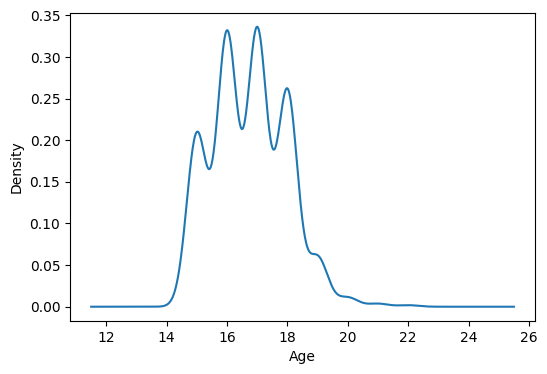

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

port.age.plot(kind="density")
plt.xlabel("Age")

*Диаграмма плотности распределения*

<Axes: >

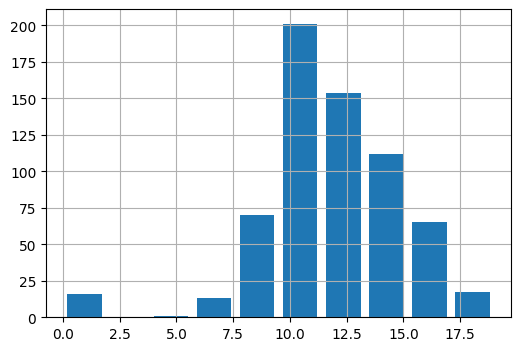

In [3]:
port.G3.hist(rwidth = 0.8)

*Гистограмма*

Похоже на распределение по Гауссу с левосторонней ассиметрией.

    2.2 Построить boxplot

Text(0, 0.5, 'Возраст')

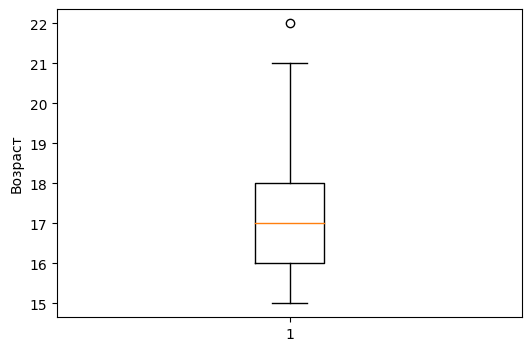

In [4]:
plt.boxplot(port.age)
plt.ylabel("Возраст")

*Построил boxplot по возрасту*

    2.3 Из диаграммы размаха видно что min колонки age – 15, а max – 21, 22 является выбросом. Из гистограммы можно сказать что больше всего людей в возрасте 17 лет, основное количество сосредоточено в диапазоне от 16 до 18 лет
    
3. Выбрать несколько непрерывных переменных и провести визуализацию отношений между переменными
    
    3.1 Построить диаграмму рассеивания, гистограмму (относительно двух переменных), матрицу корреляций

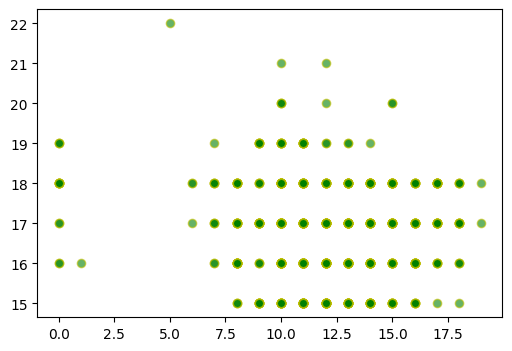

In [5]:
plt.scatter(port.G3, port.age, facecolor = "g", edgecolor = "y", alpha = 0.6, label = "rating")

*Построил матрицу рассеивания*

3. Выбрать несколько непрерывных переменных и провести визуализацию отношений между переменными

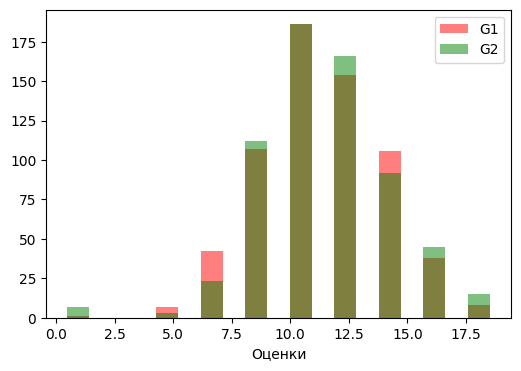

In [6]:
fig, ax = plt.subplots()
kwargs = dict(alpha = 0.5)

ax.hist(x = port.G1, **kwargs, color = 'r', rwidth = 0.5, label = "G1")
ax.hist(x = port.G2, **kwargs, color = 'g', rwidth = 0.5, label = "G2")


plt.xlabel("Оценки")
plt.legend()

*Построил гистограмму относительно двух переменных*

In [7]:
import seaborn as sns

*Импортировал seaborn*

<Axes: >

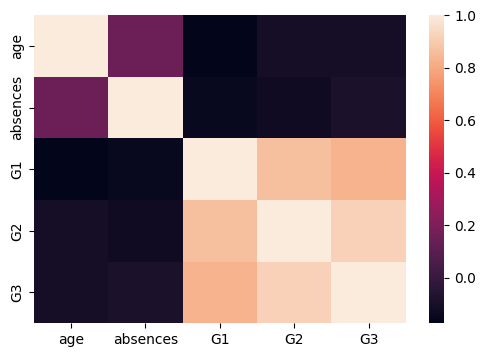

In [8]:
sns.heatmap(port[["age", "absences", "G1", "G2", "G3"]].corr())

*Построил матрицу корреляции*
Здесь видно что результаты по тестам независимы от возраста.

    3.2 Резульаты

* На третьем курсе почти не учатся люди старше 19 лет
* На первом и втором курсе количества оценок 10 не отличаются
* Оценки независят от возраста

4. Выбрать несколько переменных, X - категориальное, Y - непрерывное

    4.1 Построить гистограмму Y относительно переменной X

<Axes: xlabel='age', ylabel='Count'>

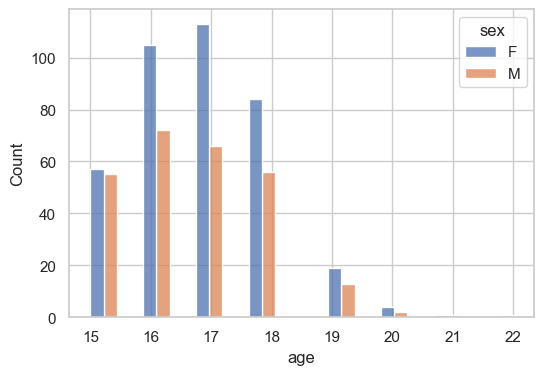

In [9]:
sns.set(style="whitegrid")

sns.histplot(data = port, x = "age",hue = "sex", multiple = "dodge")

    4.2 Построить диаграмму размаха (boxplot) относительно переменной X

<Axes: xlabel='age', ylabel='sex'>

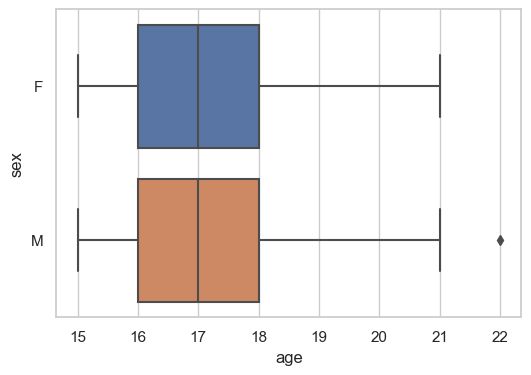

In [10]:
sns.boxplot(x = port.age, y = port.sex)

*По данной диаграмме размаха можносказать, что среднее количество как женщин так и мужчин одинаковое, кроме выброса у мужчин в возрасте 22 лет*

    4.3 Построить столбчатую диаграмму относительно переменной X

<Axes: xlabel='sex', ylabel='absences'>

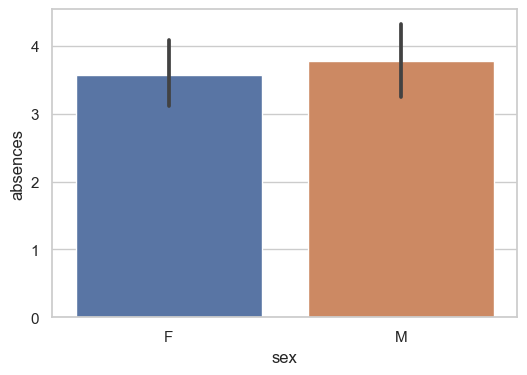

In [11]:
sns.barplot(x = port.sex, y = port.absences)

*По данной диаграмме можно сказать что у женщины пропусков почти столько же сколько у мужчин, но немного меньше*

5. Доп исследование

Я решил посмотреть как соотносится количество пропусков с алкопортеблением

<Axes: xlabel='freetime', ylabel='Dalc'>

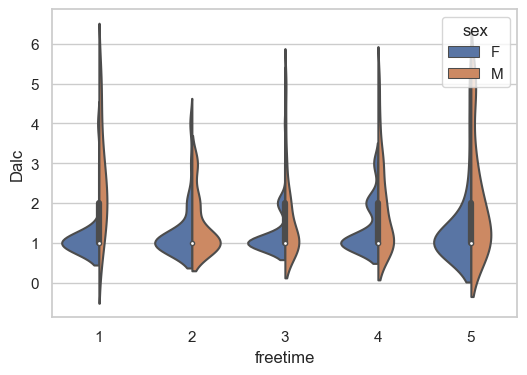

In [12]:
sns.violinplot(x = "freetime", y = "Dalc", hue = "sex", data = port, split = True)

Как видно из диаграммы выше, наличие свободного времени почти не оказывает влияние на потребление алкоголя, заметные изменения видны ближе к 3, 4 баллам